In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from checklist import checklist

%matplotlib inline

In [2]:
ticker = 'FB'

#### Load functions

In [3]:
def check_ratio(row):
    row_name = row.name
#     return type(row['Ratio'])
    checklist_vals = [val for val in checklist if row_name in val]
    min_vals = [val for val in checklist_vals if 'min' in val]
    max_vals = [val for val in checklist_vals if 'max' in val]
    assert len(min_vals) <= 1, f'Too many min values for {row.name}'
    assert len(max_vals) <= 1, f'Too many max values for {row.name}'
    if len(min_vals) == 1 and len(max_vals) == 1:
        if checklist[min_vals[0]] <= row['Ratio'] <= checklist[max_vals[0]]:
            return 'Ok'
        else:
            return 'Fail'
    elif len(min_vals) == 1 and len(max_vals) == 0:
        if checklist[min_vals[0]] <= row['Ratio']:
            return 'Ok'
        else:
            return 'Fail'
    elif len(min_vals) == 0 and len(max_vals) == 1:
        if row['Ratio'] <= checklist[max_vals[0]]:
            return 'Ok'
        else:
            return 'Fail'
    elif len(min_vals) == 0 and len(max_vals) == 0:
        return 'N/A'
    else:
        return 'Error'

#### Get data

In [4]:
# Get the latest stored data - annual reports
annuals = glob.glob(f'./annual_reports/{ticker}_*_annual_*.csv')
assert len(annuals) > 0, f'No annual files found for {ticker}'
annuals.sort()
df_annuals = pd.read_csv(annuals[-1], sep=';', header=0, index_col='fiscalYear')

In [5]:
# Get the overview data
overviews = glob.glob(f'./overviews/{ticker}_*_overview_*.csv')
assert len(overviews) > 0, f'No overview files found for {ticker}'
overviews.sort()
df_overviews = pd.read_csv(overviews[-1], sep=';', header=0, index_col='Metric')

In [8]:
# Feature engineering
df_annuals['freeCashFlow'] = df_annuals['operatingCashflow'] - df_annuals['capitalExpenditures']

#### Financial statements

In [9]:
income_st_cols_all = ['totalRevenue',
                    'costOfRevenue',
                    'grossProfit',
                    'costofGoodsAndServicesSold',
                    'operatingIncome',
                    'sellingGeneralAndAdministrative',
                    'researchAndDevelopment',
                    'operatingExpenses',
                    'investmentIncomeNet',
                    'netInterestIncome',
                    'interestIncome',
                    'interestExpense',
                    'nonInterestIncome',
                    'otherNonOperatingIncome',
                    'depreciation',
                    'depreciationAndAmortization',
                    'incomeBeforeTax',
                    'incomeTaxExpense',
                    'interestAndDebtExpense',
                    'netIncomeFromContinuingOperations',
                    'comprehensiveIncomeNetOfTax',
                    'ebit',
                    'ebitda',
                    'netIncome']

income_st_cols_top = ['totalRevenue',
                    'grossProfit',
                    'operatingIncome',
                    'incomeBeforeTax',
                    'ebit',
                    'ebitda',
                    'netIncome']

In [10]:
bal_sheet_cols_all = ['totalAssets',
                    'totalCurrentAssets',
                    'cashAndCashEquivalentsAtCarryingValue',
                    'cashAndShortTermInvestments',
                    'inventory',
                    'currentNetReceivables',
                    'totalNonCurrentAssets',
                    'propertyPlantEquipment',
                    'accumulatedDepreciationAmortizationPPE',
                    'intangibleAssets',
                    'intangibleAssetsExcludingGoodwill',
                    'goodwill',
                    'investments',
                    'longTermInvestments',
                    'shortTermInvestments',
                    'otherCurrentAssets',
                    'otherNonCurrrentAssets',
                    'totalLiabilities',
                    'totalCurrentLiabilities',
                    'currentAccountsPayable',
                    'deferredRevenue',
                    'currentDebt',
                    'shortTermDebt',
                    'totalNonCurrentLiabilities',
                    'capitalLeaseObligations',
                    'longTermDebt',
                    'currentLongTermDebt',
                    'longTermDebtNoncurrent',
                    'shortLongTermDebtTotal',
                    'otherCurrentLiabilities',
                    'otherNonCurrentLiabilities',
                    'totalShareholderEquity',
                    'treasuryStock',
                    'retainedEarnings',
                    'commonStock',
                    'commonStockSharesOutstanding']

bal_sheet_cols_top = ['totalAssets',
                    'cashAndCashEquivalentsAtCarryingValue',
                    'totalShareholderEquity']

In [11]:
cash_flow_cols_all = ['operatingCashflow',
                    'paymentsForOperatingActivities',
                    'proceedsFromOperatingActivities',
                    'changeInOperatingLiabilities',
                    'changeInOperatingAssets',
                    'depreciationDepletionAndAmortization',
                    'capitalExpenditures',
                    'changeInReceivables',
                    'changeInInventory',
                    'profitLoss',
                    'cashflowFromInvestment',
                    'cashflowFromFinancing',
                    'proceedsFromRepaymentsOfShortTermDebt',
                    'paymentsForRepurchaseOfCommonStock',
                    'paymentsForRepurchaseOfEquity',
                    'paymentsForRepurchaseOfPreferredStock',
                    'dividendPayout',
                    'dividendPayoutCommonStock',
                    'dividendPayoutPreferredStock',
                    'proceedsFromIssuanceOfCommonStock',
                    'proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet',
                    'proceedsFromIssuanceOfPreferredStock',
                    'proceedsFromRepurchaseOfEquity',
                    'proceedsFromSaleOfTreasuryStock',
                    'changeInCashAndCashEquivalents',
                    'changeInExchangeRate',
                    # Custom
                    'freeCashFlow']

cash_flow_cols_top = ['operatingCashflow',
                    'cashflowFromInvestment',
                    'cashflowFromFinancing',
                    'dividendPayout',
                    'freeCashFlow']

#### Plot key data

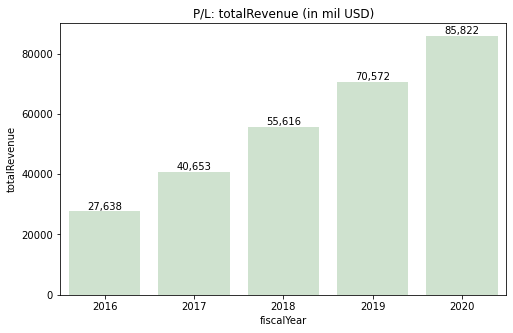

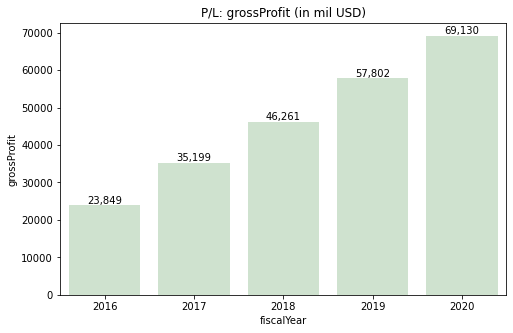

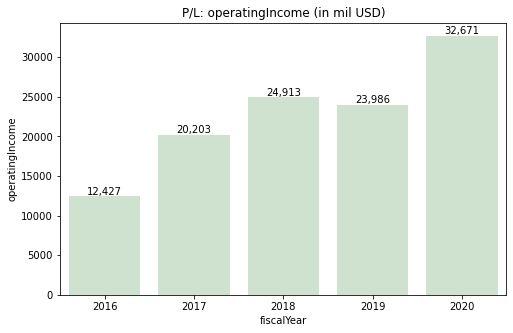

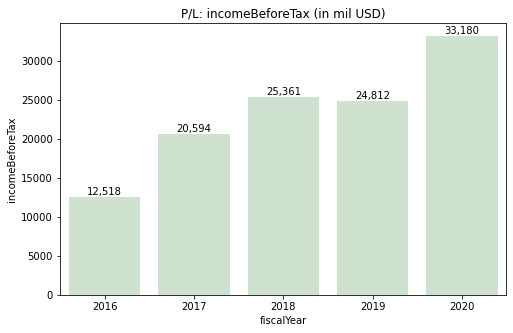

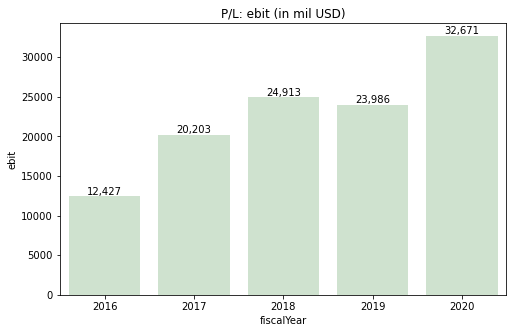

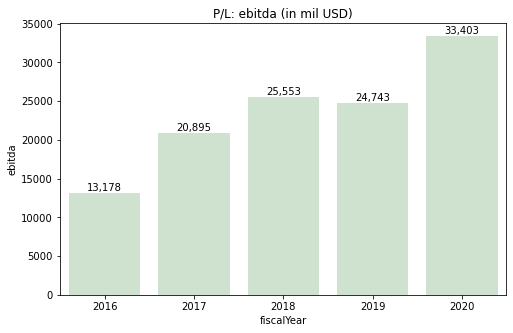

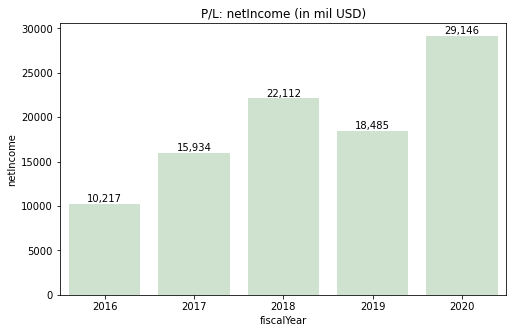

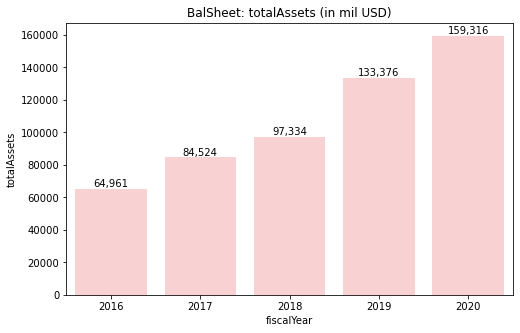

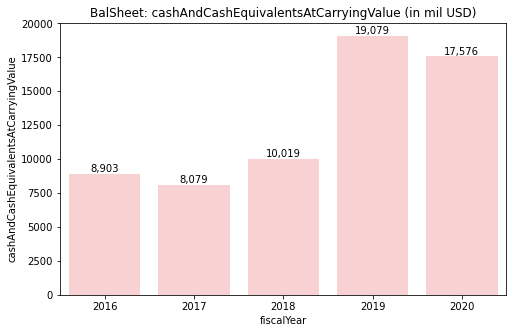

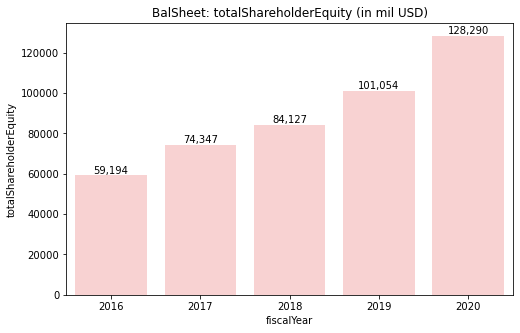

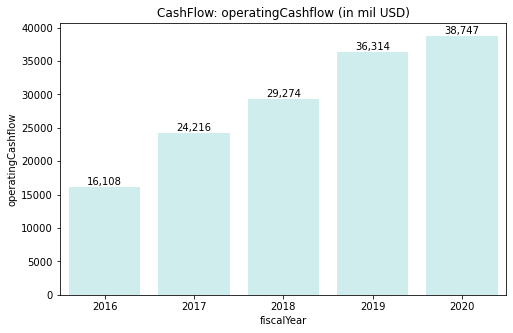

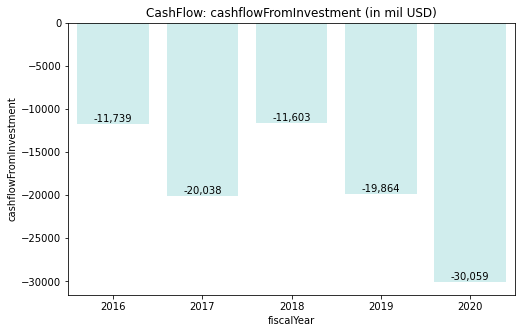

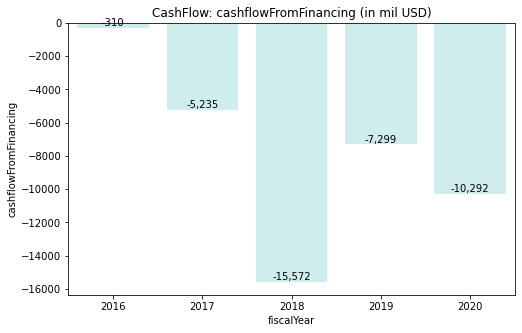

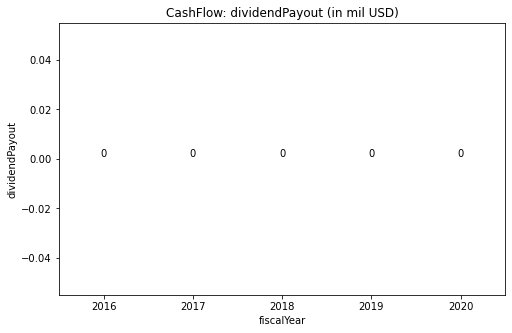

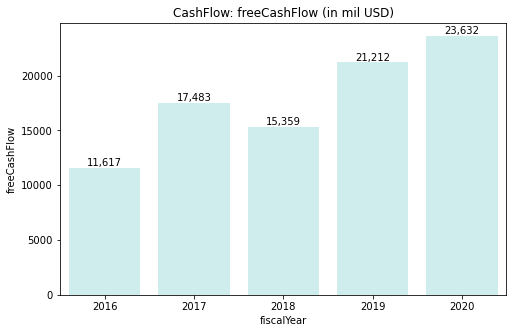

In [12]:
# Plot key values
statement_map = { 'P/L': (income_st_cols_top, 'g'),
                  'BalSheet': (bal_sheet_cols_top, 'r'),
                  'CashFlow': (cash_flow_cols_top, 'c')}


for statement in statement_map:
    for col in statement_map[statement][0]:
        plt.figure(figsize=(8,5))
        plots = sns.barplot(x=df_annuals.index, 
                            y=col, 
                            data=(df_annuals / 1000000),
                            alpha=0.2,
                            color=statement_map[statement][1])
        for bar in plots.patches:
            plots.annotate(format(bar.get_height(), ',.0f'),  
                           (bar.get_x() + bar.get_width() / 2,  
                            bar.get_height()), ha='center', va='center', 
                           size=10, xytext=(0, 5), 
                           textcoords='offset points')
        plt.title(f'{statement}: {col} (in mil USD)')
        plt.show()

In [13]:
df_overviews.loc[[  'TrailingPE',
                    'PriceToBookRatio',
                    'ReturnOnEquityTTM'], :]

,Value
Metric,
TrailingPE,26.6006
PriceToBookRatio,6.0794
ReturnOnEquityTTM,0.2542


#### Check key ratios

In [14]:
ratio_map = {'PE': 'TrailingPE',
             'PB': 'PriceToBookRatio',
             'RoE': 'ReturnOnEquityTTM'}
ratios = dict()

for ratio in ratio_map:
    ratios[ratio] = float(df_overviews.loc[ratio_map[ratio], :].fillna(0)[0])

ratios['DE'] = df_annuals.loc[2020, 'totalLiabilities'] / df_annuals.loc[2020, 'totalShareholderEquity']
ratios['CurrRatio'] = df_annuals.loc[2020, 'totalCurrentAssets'] / df_annuals.loc[2020, 'totalCurrentLiabilities']

In [15]:
# Check ratios
df_ratios = pd.DataFrame.from_dict(ratios, orient='index').rename(columns={0:'Ratio'})
df_ratios['Check'] = df_ratios.apply(check_ratio, axis=1)
df_ratios.round(2)

,Ratio,Check
PE,26.60,Ok
PB,6.08,Fail
RoE,0.25,Ok
DE,0.24,Ok
CurrRatio,5.05,Fail
